<a href="https://www.kaggle.com/code/willabsolute/us-accidents-data-analysis?scriptVersionId=96133169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The Impact of Environmental Factors and the COVID-19 Period on US Car Accidents

## Table of Contents
* [Introduction](#section-1)
* [Ask](#section-2)
* [Prepare](#section-3)
* [Process](#section-4)
* [Analyze](#section-5)
* [Share](#section-6)
* [Act](#section-7)

***If you are viewing this from Github, you can clicked the button 'Open in Kaggle' at the top left corner for a better experience!***

<a id="section-1"></a>
# Introduction
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. 

Personally, I'm interested in doing an exploratory data analysis on how different factors might cause car accidents. I will use this US-Accidents dataset to extract cause that contribute to car accidents and how different factors affect the severity of the accidents differently. Additionally, I'll study traffic behavior and accidents espcially during COVID-19 period.


<a id="section-2"></a>
## Ask
1. What topic are we exploring? 

   US car accidents; causality analysis; the environmeantla casue behind car accidents; the traffic behavior and accidents during COVID-19.
2. What is the problem we are trying to solve?

   How do different environmental factors affect the car accidents differently?
   Does COVID-19 have any impact on traffic behavior and accidents?
3. What metrics will we use to measure your data to achieve our objective?

   I'll use the environmental factors such as temperature, precipitation, windspeed and so on to analyze the impact of environmental factors on car accidents. Meanwhile, I'll use the Start_Time of the accidents, the location (Start_Lng and Start_Lat) of the accidents to help finding other possible insights.
4. Who are the stakeholders?

   The stakeholders will be car insurance issuer and also local transporation safety staffs.
5. Who is the audience?

   People who drive cars and those who have the power to make adjustments and concern the safety of drivers.
6. My hypothesis

   Cold weathers, high precipitation, low visibility has a strong relation with the number of traffics, where low visibility has the most number of severe accidents.
   
   COVID-19 has an impact on traffic, and it makes the number of accidents fewer.

<a id="section-3"></a>
## Prepare
We will identify how the data is organized, understand the data by sorting and filtering the data, and determine the credibility of the data.

#### Download the dataset and set it up

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandasql as psql
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


In [2]:
data_file_name = '../input/us-accidents/US_Accidents_Dec21_updated.csv'
df =pd.read_csv(data_file_name)

#### Checking out the kinds of metrics we can use to analyze the dataset.

In [3]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

#### Checking out the number of missing values in percentage.

<AxesSubplot:title={'center':'\n Missing Percentage of Data Metrics \n'}, xlabel='\n Missing Percentage\n', ylabel='\n Data Metrics \n'>

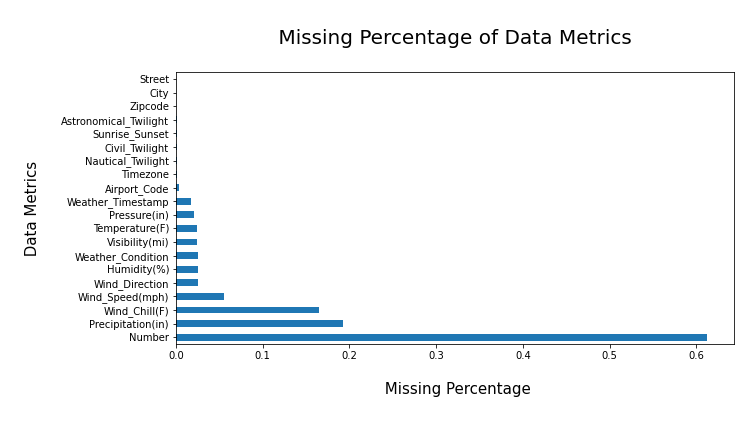

In [5]:
plt.figure(figsize=(10,5))
plt.title('\n Missing Percentage of Data Metrics \n', size=20)
plt.ylabel('\n Data Metrics \n', fontsize=15)
plt.xlabel('\n Missing Percentage\n', fontsize=15)
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage[missing_percentage!=0].plot(kind='barh')

Text(0, 0.5, 'Number of Cases')

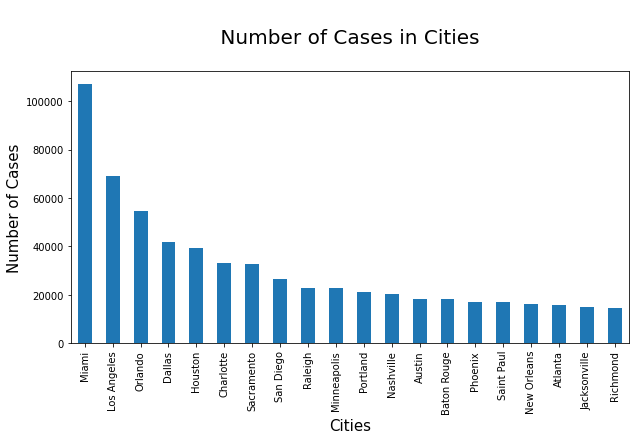

In [6]:
cities_accidents= df.City.value_counts()
ax =cities_accidents[:20].plot(kind='bar',title='\n Number of Cases in Cities \n',
                          figsize=(10,5))
ax.title.set_size(20)
ax.set_xlabel("Cities",fontdict={'fontsize':15})
ax.set_ylabel("Number of Cases",fontdict={'fontsize':15})


In [7]:
"NY" in df.State

False

We don't have car accidents data of New York state.

In [8]:
sns.set_style('darkgrid')
high_accident_cities = cities_accidents[cities_accidents>=1000] 
low_accident_cities = cities_accidents[cities_accidents<1000] 

In [9]:
len(high_accident_cities)/len(cities_accidents)

0.04246211796935194

<AxesSubplot:title={'center':'\n Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

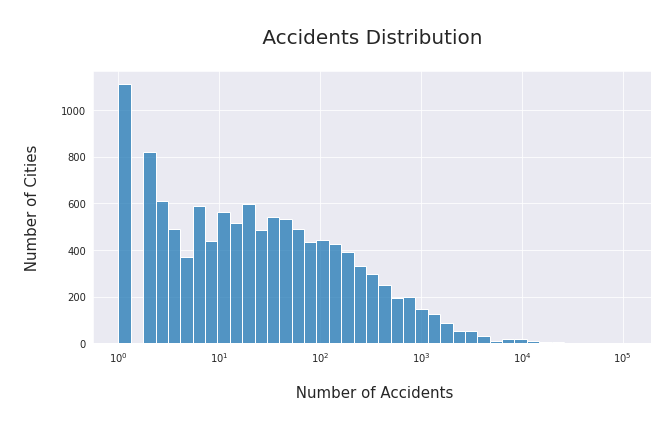

In [10]:
plt.figure(figsize = (10,5))
plt.title('\n Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(cities_accidents,log_scale=True)

<AxesSubplot:title={'center':'\n Dangerous Cities Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

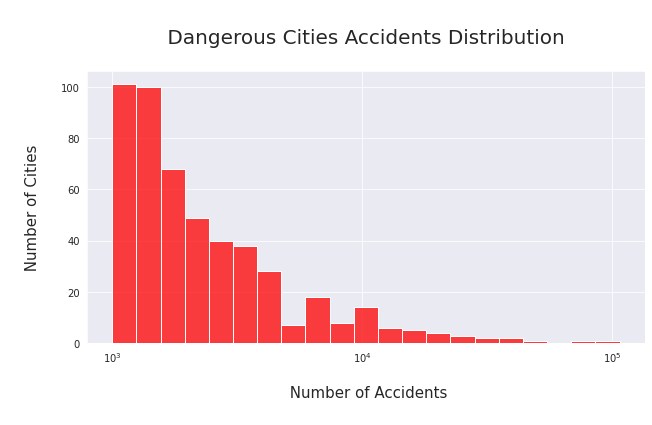

In [11]:
plt.figure(figsize = (10,5))
plt.title('\n Dangerous Cities Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(high_accident_cities,log_scale=True,color='red')

<AxesSubplot:title={'center':'\n Safe Cities Accidents Distribution \n'}, xlabel='\n Number of Accidents\n', ylabel='\n Number of Cities \n'>

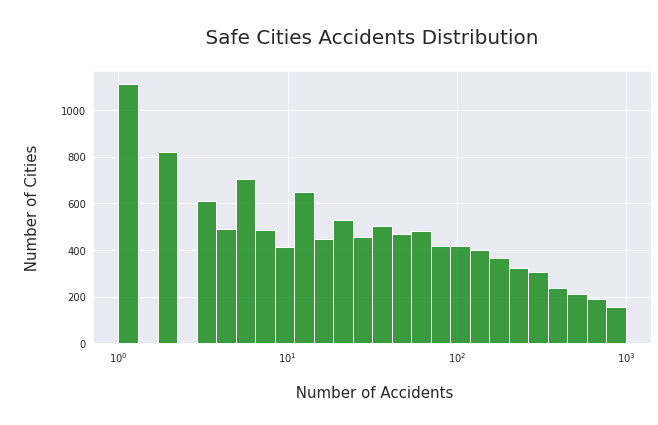

In [12]:
plt.figure(figsize = (10,5))
plt.title('\n Safe Cities Accidents Distribution \n', size=20)
plt.ylabel('\n Number of Cities \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
sns.histplot(low_accident_cities,log_scale=True,color='green')

#### Brief Summary/Documentation
The dataset is a structured and organized dataset with 47 metrics. It's collected continuously, including APIs that provide streaming traffic event data. The parties that capture these data are US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Nearly around 2.9 million accidents were recorded from Feb 2016 to Dec 2021. The dataset is about describing environmental types of metrics and geospatial information of the reported US car accidents. Though the dataset may lack some crucial data that's mentioned below, it still has enough credibility. [here](https://smoosavi.org/datasets/us_accidents)
 
After briefly understanding the dataset, I find out that Miami has the most number of car accidents from Feb 2016- Dec 2021. However, the dataset does not contain any information about New York City, even being the most populous city in the states. The dataset does not cover the whole year of 2016, so there's a small lack of data. I define the dangerous city as a city that has more than 1000 accidents. Only 5% of all recorded cities in the US are dangerous in terms of the number of car accidents.

I then generated three histplot to see the number of cities that fall in each bin. The reason not to use distplot or kdeplot is to advoid unclear distribution. At first I see how all the accidents distribute, but then I divide it into two groups. Graph with red columns represents the distribution of cities with high number of accidents. Graph with green columns represents the distribution of cities with low number of accidents. However, it is strange to see more than 1000 cities only have 1 accident during those years.



<a id="section-4"></a>
## Process
We will clean the data and extract what we need for the analysis.

Since we are only interested in how environmental factors and COVID-19 periods affect the traffic, We will only keep the following columns: ID, Start_Time, Start_Lat, Start_Lng, City, Temperature(F), Wind_Speed(mph), Humidity(%), Precipitation(in), Visibility(mi), Weather_Condition and drop the remaining columns for cleaner analysis. These other factors also have a large portion being null, so they are not very helpful for the analysis.

The first step is to fill the appropriate values in the columns with Null values. Depending on the distribution and the number of Nulls, I deploy different methods to clean the dataset.

In [13]:
df= df.drop(columns=["End_Time","End_Lat",'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street','Side', 'County', 'State', 'Zipcode', 'Country', 'Timezone','Airport_Code', 'Weather_Timestamp', 'Wind_Chill(F)', 'Pressure(in)', 'Wind_Direction','Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight'])

In [14]:
df.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06,2.772250e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,6.179356e+01,6.436545e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,1.862263e+01,2.287457e+01,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,5.000000e+01,4.800000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,6.400000e+01,6.700000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,7.600000e+01,8.300000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,1.960000e+02,1.000000e+02,1.400000e+02,1.087000e+03,2.400000e+01


However, we find out that there are many empty values for all these environmental metrics.

In [15]:
print(df.isnull().sum())

ID                        0
Severity                  0
Start_Time                0
Start_Lat                 0
Start_Lng                 0
City                    137
Temperature(F)        69274
Humidity(%)           73092
Visibility(mi)        70546
Wind_Speed(mph)      157944
Precipitation(in)    549458
Weather_Condition     70636
dtype: int64


<AxesSubplot:title={'center':'\n Distribution of Accidents Temperatue  \n'}, xlabel='\n Temperature(F) \n', ylabel='\n Density \n'>

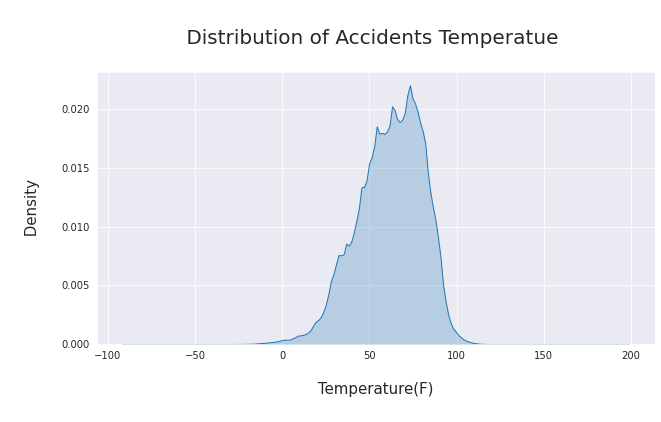

In [16]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Temperatue  \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)
sns.kdeplot(data=df["Temperature(F)"],shade=True)

<AxesSubplot:title={'center':'\n Distribution of Accidents Visibility \n'}, xlabel='\n Visibility(mi)\n', ylabel='\n Density \n'>

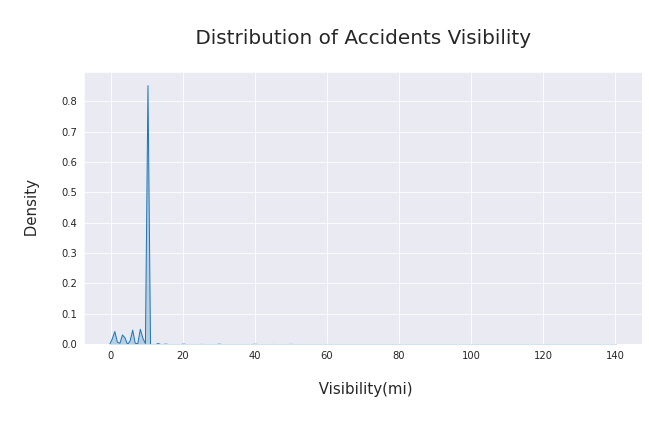

In [17]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Visibility \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Visibility(mi)\n', fontsize=15)
sns.kdeplot(data=df["Visibility(mi)"],shade=True)

Since temperature has less than 10% null values of the total number of values and they appear to be normally distributed. It might be a good idea to fill these empty data with the mean value. Whereas for Visibility(mi), it's right skewed. So replacing null values with a median value is more suitable.

In [18]:
df['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())

In [19]:
df["Weather_Condition"].value_counts()

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

Since there are 127 types of weather condition and it's hard to differentiate and many of them can be consider as one big category. It's better to drop the column. 

In [20]:
df=df.drop(columns=["Weather_Condition"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'\n Distribution of Accidents WindSpeed\n'}, xlabel='Wind_Speed(mph)'>

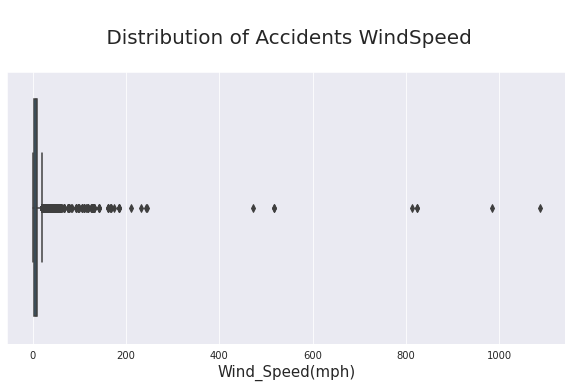

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('\n Distribution of Accidents WindSpeed\n', size=20)
plt.xlabel('\n Wind Speed (mph)\n', fontsize=15)
sns.boxplot(df["Wind_Speed(mph)"])

<AxesSubplot:title={'center':'\n Distribution of Accidents Precipitation \n'}, xlabel='\n Precipitation(in) \n', ylabel='\n Density \n'>

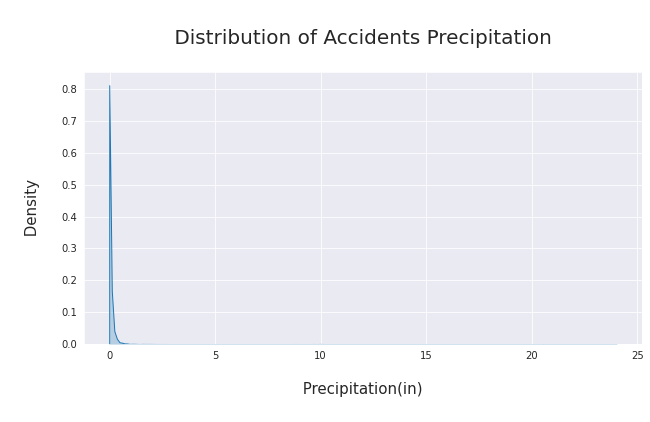

In [22]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Precipitation \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Precipitation(in) \n', fontsize=15)
sns.kdeplot(data=df["Precipitation(in)"],shade=True)

<AxesSubplot:title={'center':'\n Distribution of Accidents Humidity \n'}, xlabel='\n Humidity(%) \n', ylabel='\n Density \n'>

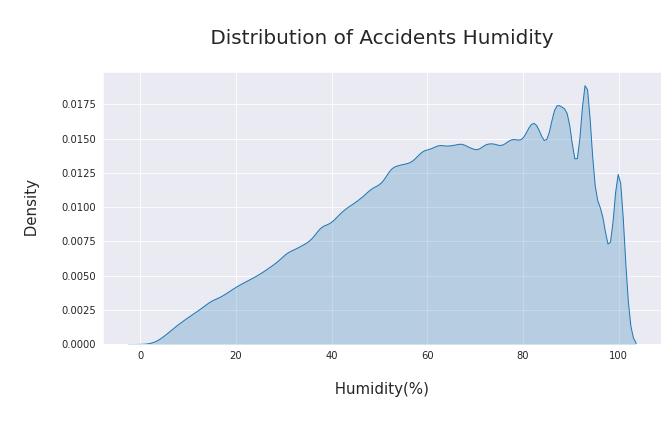

In [23]:
plt.figure(figsize = (10,5))
plt.title('\n Distribution of Accidents Humidity \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Humidity(%) \n', fontsize=15)
sns.kdeplot(data=df["Humidity(%)"],shade=True)

In [24]:
df['Precipitation(in)'].value_counts()
df["Wind_Speed(mph)"].value_counts()
df["Wind_Speed(mph)"].value_counts() ### 7.3950442026078775
df['Precipitation(in)'].mean() ### 0.007016939880237856
df["Wind_Speed(mph)"].isnull().sum() ### 157944
df["Precipitation(in)"].isnull().sum() ### 549458

549458

Since Precipitation(in), Wind_Speed(mph) have an right skewed distribution. It's better to use mode value to fill the Null value in these two columns.  Humidity(%) though has a left skwed distribution. I still used the mode value to fill out the Null. It may not be accurate to fill out the Null value based on the previous or latter adjacent value, as every two accidents were hardly related. 

In [25]:
df['Precipitation(in)']=df['Precipitation(in)'].fillna(df['Precipitation(in)'].mode()[0])
df['Wind_Speed(mph)']=df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mode()[0])
df['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].mode()[0])

There are 137 City that are missing. I decide to drop these rows as it's unlikely and unfair to make these accidents happen in one city, and I have more than 2.8 million data to do analysis.

In [26]:
df = df.dropna(axis=0)

In [27]:
df

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,Dublin,42.1,58.0,10.0,10.4,0.00
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,Dayton,36.9,91.0,10.0,0.0,0.02
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,Cincinnati,36.0,97.0,10.0,0.0,0.02
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,Akron,39.0,55.0,10.0,0.0,0.00
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,Cincinnati,37.0,93.0,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,86.0,40.0,10.0,13.0,0.00
2845338,A-2845339,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,70.0,73.0,10.0,6.0,0.00
2845339,A-2845340,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,73.0,64.0,10.0,10.0,0.00
2845340,A-2845341,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,71.0,81.0,10.0,8.0,0.00


#### Brief Summary/Documentation
We find out that there are several factors such as Street, Zipcode have many missing values. In this case, these factors may not be able to contribute many information in our anlaysis. Since we want to find out how different environmental factors may contribute to the severity and potentially finding out which seems to be more responsible for car accidents. I extract only relevant columns. They are Precipitation(in), Wind_Speed(mph), Temperature(F), Visibility(mi), Humidity(%) and Weather_Condition.

When undertanding these various environmental factors, I first check out the distribution of each. Temperature behaves normally while the other three skewed to the right. For each of these columns, the lack of value only counts less than 20% of total number of data. So it's not advisbale to delete the whole rows that may contain Null value. For Weather_Condition, there are 127 kinds of values that describes the weather and the majority of them only has 1 value. So it's not that useful for our data analysis. Finally, we drop the rows that have missing city because it's hard to infer which city this accident belonged to and unfair to contribute all of the 137 missing city accidents to one or two cities.

Now we have cleaned and adjusted our data properly. I will discover the relationship between the factors and the severity of the car accidents and the number of accidents, the impact of covid on car number of accidents (value_counts) geolocation wise and time period wise.

<a id="section-5"></a>
## Analyze
Things to be analyzed: 
* [Enviornmental Factors Analysis car accidents](#section-10)
* [Time Analysis](#section-11)
* [Location Analysis](#section-12)

<a id="section-10"></a>
### Environmental Factors Analysis

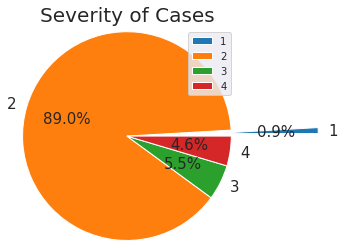

In [28]:
severity_pie = df.groupby('Severity').count()['ID'] ### group by severity in order to do circle map
mylabels = ["1", "2", "3", "4"]
plt.title("Severity of Cases",fontsize=20)
plt.pie(severity_pie, labels = mylabels,autopct='%1.1f%%',textprops={'fontsize': 15},radius=1.2,explode=(1,0,0,0))
plt.legend(mylabels, loc="best")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'\n Case Reported for Temperature \n'}, xlabel='Temperature(F)', ylabel='\n Number of Accidents \n'>

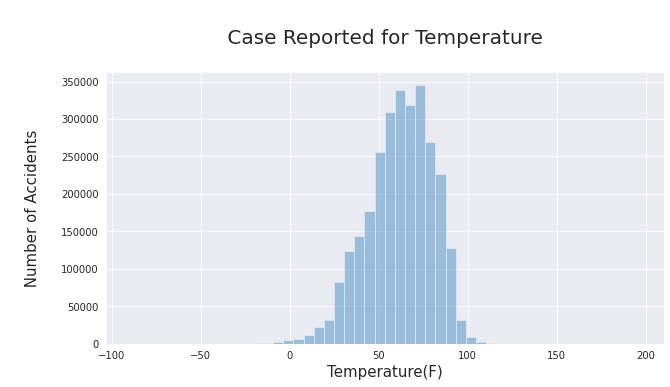

In [29]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Case Reported for Temperature \n', size=20)
plt.ylabel('\n Number of Accidents \n', fontsize=15)
plt.xlabel('\n Temperature(F)\n', fontsize=15)
sns.distplot(a=df["Temperature(F)"],kde=False) 

What is the relationship between temperature and the severity of accidents?

<AxesSubplot:title={'center':'\n Relationship between Temperature and Severity \n'}, xlabel='Severity', ylabel='Temperature(F)'>

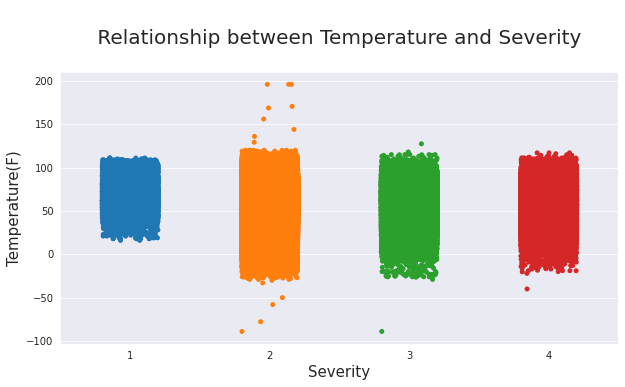

In [30]:
### sns.regplot(x=df_2['Severity'],y=df_2['Temperature(F)'])
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Temperature and Severity \n', size=20)
plt.ylabel('\n Temperature(F) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Temperature(F)'],data=df,jitter=0.2)

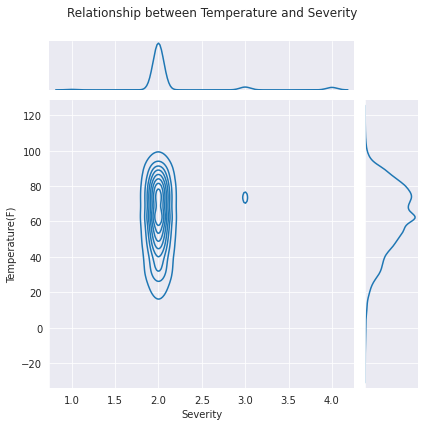

In [31]:
df_2 = df.sample(frac=0.01)
p=sns.jointplot(x=df_2["Severity"],y=df_2["Temperature(F)"],kind='kde')
p.fig.suptitle('Relationship between Temperature and Severity')
p.ax_joint.collections[0].set_alpha(0)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.9)
#plt.title('\n Relationship between Temperature and Severity \n', size=15)
#plt.title('Relationship between Temperature and Severity', y=1.5, fontsize = 15)
#plt.ylabel('\n Temperature(F) \n', fontsize=15)
#plt.xlabel('\n Severity \n', fontsize=15)

Do accidents with different severity scores behave the same, temperature wise?

Text(0.5, 6.79999999999999, '\n Temperature(F) \n')

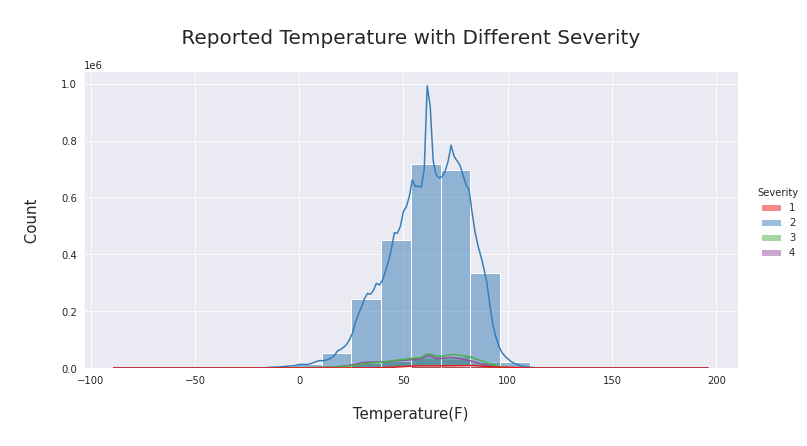

In [32]:
sns.displot(df, x="Temperature(F)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Temperature with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Temperature(F) \n', fontsize=15)

### integrate severity into Temperature(F) distribution. 

<AxesSubplot:title={'center':'\n Relationship between Humidity and Severity \n'}, xlabel='Severity', ylabel='Humidity(%)'>

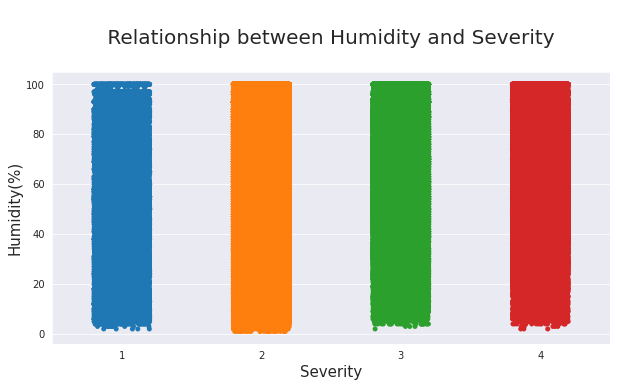

In [33]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Humidity and Severity \n', size=20)
plt.ylabel('\n Humidity(%) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Humidity(%)'],data=df,jitter=0.2)

Text(0.5, 6.79999999999999, '\n Humdity(%) \n')

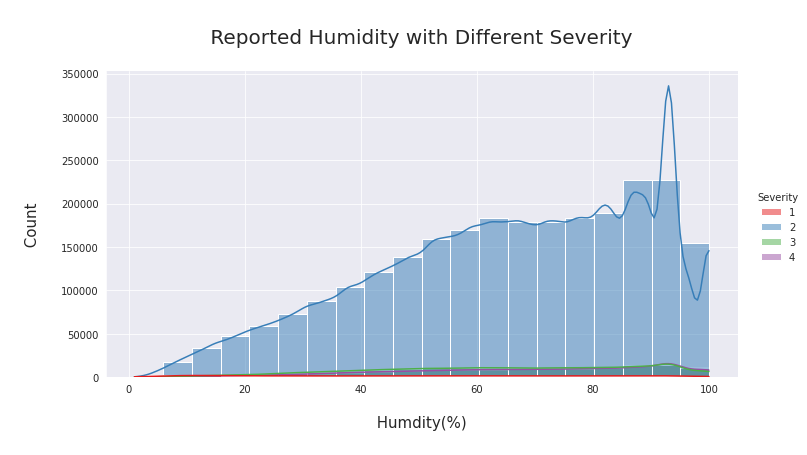

In [34]:
sns.displot(df, x="Humidity(%)", hue="Severity", palette="Set1", height=5, aspect=2,bins=20,kde=True)
plt.title('\n Reported Humidity with Different Severity \n', size=20)
plt.ylabel('\n Count \n', fontsize=15)
plt.xlabel('\n Humdity(%) \n', fontsize=15)

How many cases are there with different visibility? What's the relationship between visibility and severity scors?

<AxesSubplot:title={'center':'\n Relationship between Visibility and Severity \n'}, xlabel='Severity', ylabel='Visibility(mi)'>

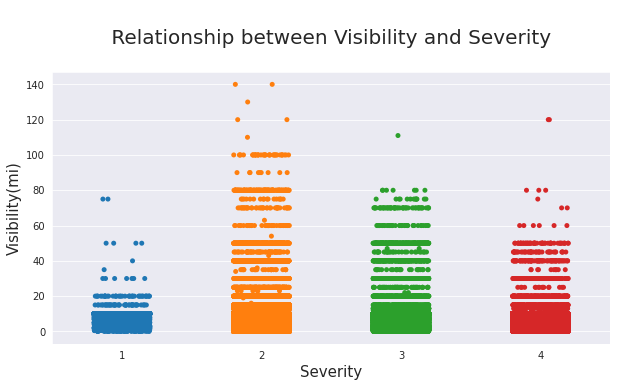

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Visibility and Severity \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Visibility(mi)'],data=df,jitter=0.2)

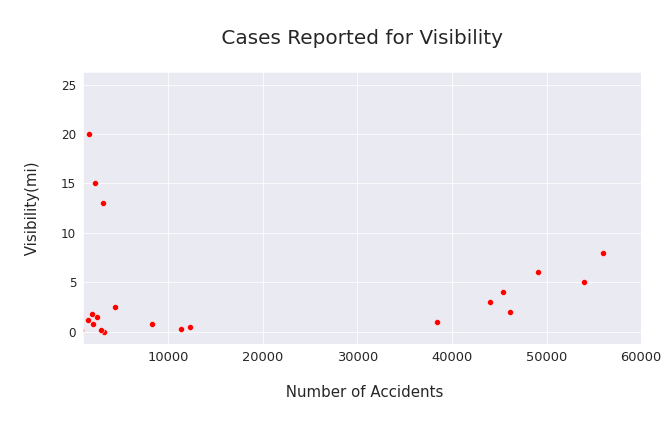

In [36]:
visibility = pd.DataFrame(df["Visibility(mi)"].value_counts()).reset_index().rename(columns={"index":"Visibility","Visibility(mi)":"Cases"})
### recreate a panda data frame
plt.figure(figsize=(10,5))
plt.title('\n Cases Reported for Visibility \n', size=20)
plt.ylabel('\n Visibility(mi) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(1000,60000)
a = sns.scatterplot(x=visibility.Cases,y=visibility.Visibility[visibility.Visibility<30],color='red')
plt.show()

How many cases are there with different precipitation? What's the relationship between precipitations and severity scors?

<AxesSubplot:title={'center':'\n Relationship between Precipitation and Severity \n'}, xlabel='Severity', ylabel='Precipitation(in)'>

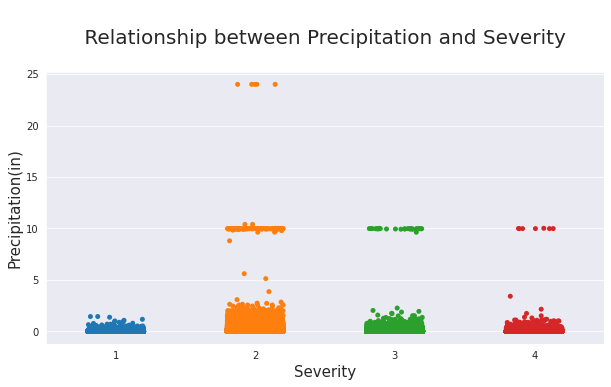

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between Precipitation and Severity \n', size=20)
plt.ylabel('\n Precipitation(in) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Precipitation(in)'],data=df,jitter=0.2)

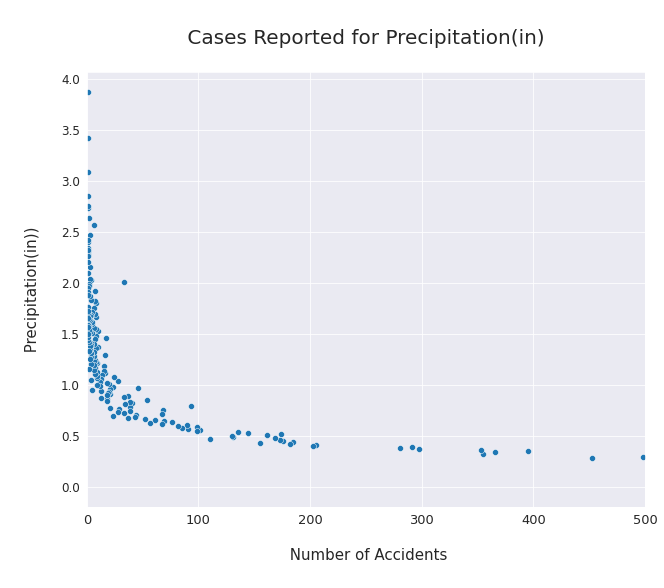

In [38]:
precipitation = pd.DataFrame(df["Precipitation(in)"].value_counts()).reset_index().rename(columns={"index":"Precipitation","Precipitation(in)":"Cases"})
plt.figure(figsize=(10,8))
plt.title('\n Cases Reported for Precipitation(in) \n', size=20)
plt.ylabel('\n Precipitation(in)) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0,500)
a = sns.scatterplot(x=precipitation.Cases,y=precipitation.Precipitation[precipitation.Precipitation<5])
plt.show()

How many cases are there with different wind speeds? What's the relationship between the wind speed and severity scors?

<AxesSubplot:title={'center':'\n Relationship between WindSpeed and Severity \n'}, xlabel='Severity', ylabel='Wind_Speed(mph)'>

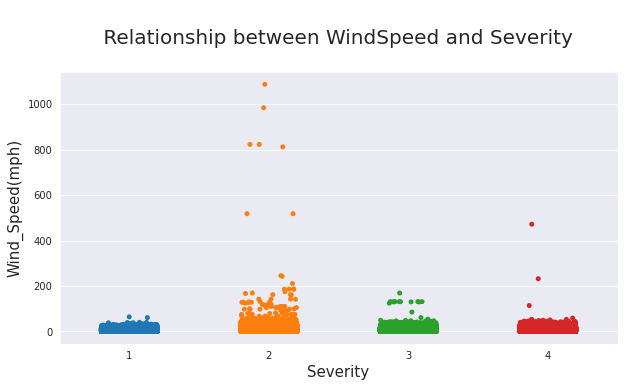

In [39]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('\n Relationship between WindSpeed and Severity \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Severity \n', fontsize=15)
sns.stripplot(x=df['Severity'],y=df['Wind_Speed(mph)'],data=df,jitter=0.2)

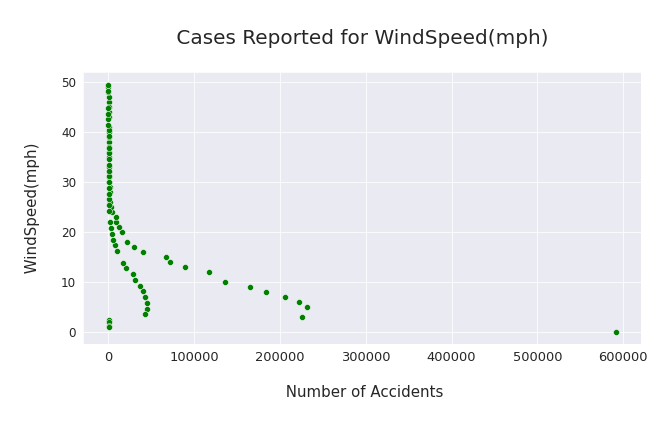

In [40]:
windspeed = pd.DataFrame(df["Wind_Speed(mph)"].value_counts()).reset_index().rename(columns={"index":"Wind_Speed","Wind_Speed(mph)":"Cases"})
plt.figure(figsize=(10,5))
plt.title('\n Cases Reported for WindSpeed(mph) \n', size=20)
plt.ylabel('\n WindSpeed(mph) \n', fontsize=15)
plt.xlabel('\n Number of Accidents\n', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.scatterplot(x=windspeed.Cases,y=windspeed.Wind_Speed[windspeed.Wind_Speed<50],color='green')
plt.show()

#### Brief Summary/Documentation
We've just analyzed how different environmental factors might contribute to the number of accidents, how different environmental factors may influence the severity of the accidents. 

I have used pie chart, distplot, stripplot, jointplot, scatterplot, and etc to see the relationship between some environmental factors, severity and number of accidents. More conclusions and findings can be see in the last section.

<a id='section-11'></a>
### Time Analysis: car accidents during the COVID-19 period

In [41]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845205, dtype: object

In [42]:
df.Start_Time= pd.to_datetime(df.Start_Time)

What time of the day have the most accidents?

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'\n Distribution of Accidents Start Time \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

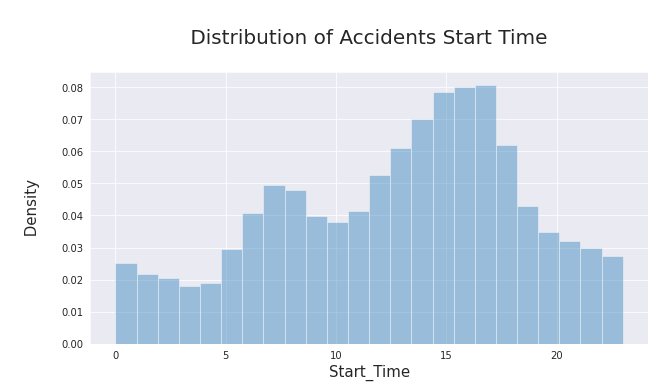

In [43]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Accidents Start Time \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24) \n', fontsize=15)
sns.distplot(df.Start_Time.dt.hour,bins =24,kde=False, norm_hist=True)

A high percentage of accidents occure between 15 to 18. Probably people are hurry to get home. The next highest one is around 6 to 8. This might be due to people going to work.

<AxesSubplot:title={'center':'\n Distribution of Accidents Start Day \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

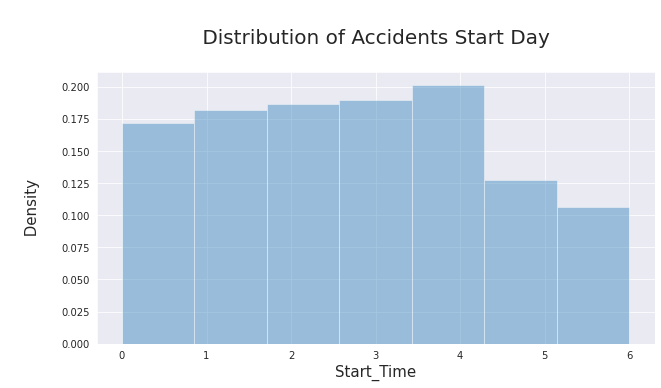

In [44]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Accidents Start Day \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Day) \n', fontsize=15)
sns.distplot(df.Start_Time.dt.dayofweek,bins =7,kde=False, norm_hist=True)

On weekends the number of accidents is lower.
Is the distribution of accidents same on weekdays and on weekends?

<AxesSubplot:title={'center':'\n Distribution of Sunday Accidents Start Hour \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

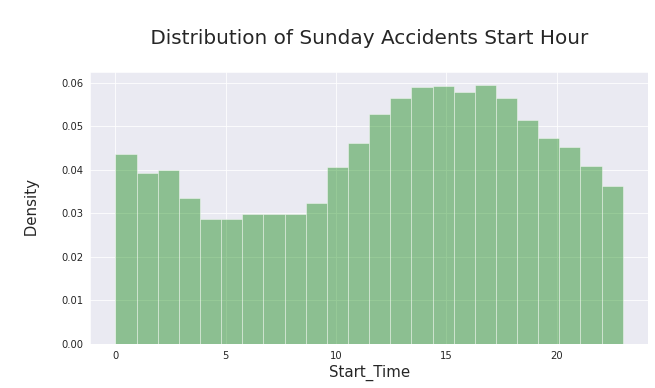

In [45]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Sunday Accidents Start Hour \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24)) \n', fontsize=15)
sundays_accidents= df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sundays_accidents.dt.hour,bins =24,kde=False, norm_hist=True, color='green')

The distribution of Sunday accidents start time is different than the overall start time accidents distribution. Especiallt the density is high at 0 o'clock for sunday accidents.

<AxesSubplot:title={'center':'\n Distribution of Monday Accidents Start Hour \n'}, xlabel='Start_Time', ylabel='\n Density \n'>

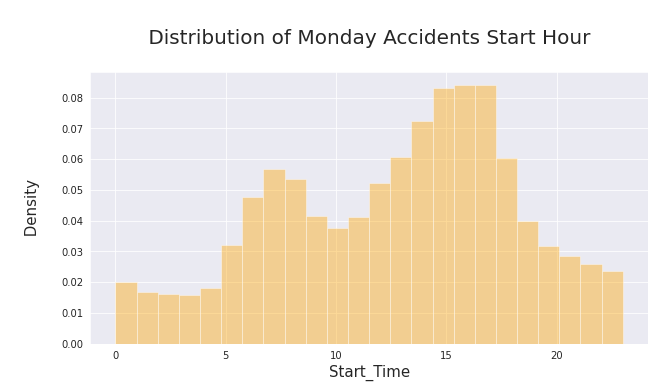

In [46]:
plt.figure(figsize=(10,5))
plt.title('\n Distribution of Monday Accidents Start Hour \n', size=20)
plt.ylabel('\n Density \n', fontsize=15)
plt.xlabel('\n Time: Hour(24) \n', fontsize=15)
monday_accidents=df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_accidents.dt.hour,bins=24,kde=False,norm_hist=True,color='orange')

This monday accidents start time distribution is very similar to the overall one. 

In [47]:
# collect each year's number of incidents to see the overall trend of year accidents
year_data= pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"Year","Start_Time":"Accident_Cases"})
# sns.distplot(year_data,bins =4,kde=False, norm_hist=True)
#plt.figure(figsize=(10,8))
year_data
#plt.title("Number of Reported Accidents (2016-2021) Trend")
#sns.lineplot(data=year_data["Accident_Cases"],label="yearly accidents")

,Year,Accident_Cases
0,2021,1511684
1,2020,625826
2,2019,258610
3,2017,163903
4,2018,163171
5,2016,122011


In [48]:
year_month = df["Start_Time"].groupby(df.Start_Time.dt.to_period("M")).agg('count').reset_index(name='Num_Accidents')
year_month ### Create the panda series for trend plot below and name or reset the value counts column as Num_Accidents

,Start_Time,Num_Accidents
0,2016-01,7
1,2016-02,546
2,2016-03,2398
3,2016-04,5904
4,2016-05,7147
...,...,...
67,2021-08,117706
68,2021-09,132465
69,2021-10,144462
70,2021-11,185356


<AxesSubplot:title={'center':'Number of Accidents of 2016-2021 by Months'}, xlabel='Month', ylabel='Number of Accidents'>

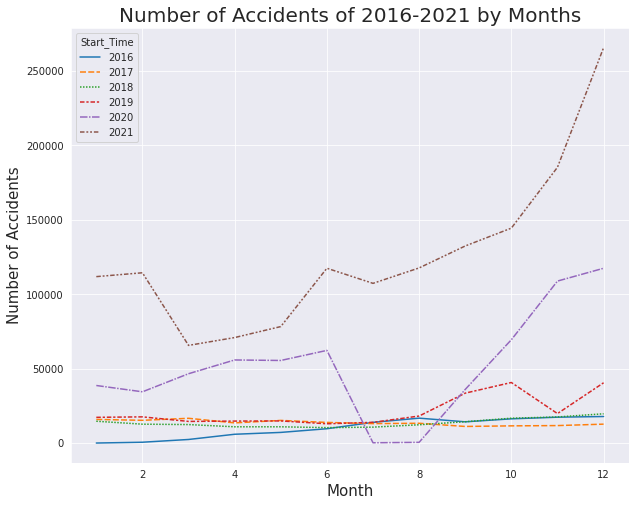

In [49]:
palette = sns.color_palette("tab10", 6)
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('Number of Accidents of 2016-2021 by Months',size=20)
sns.lineplot(data=year_month, x=year_month.Start_Time.dt.month, y=year_month.Num_Accidents, hue=year_month.Start_Time.dt.year,
             style=year_month.Start_Time.dt.year, palette=palette)

We see there's a rising number of car accidents in 2020 and 2021.(Covid-19 period) But is it due to the environmental factors? We may need to have more data related to the number of positive cases, government policies etc. But we could check out the yearly environmental influence.

<AxesSubplot:title={'center':'Temperature Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Temperature level'>

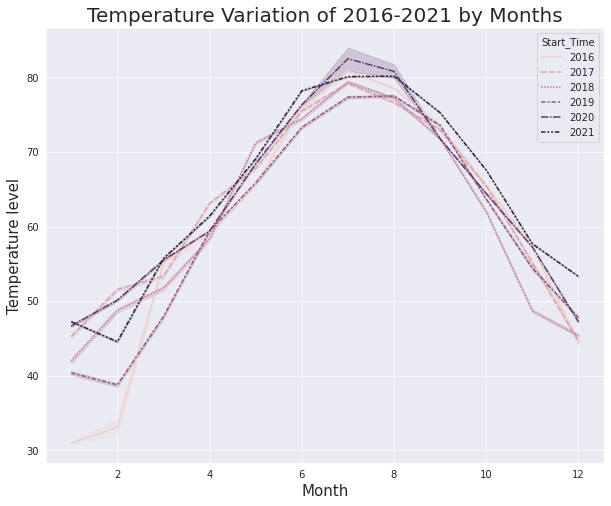

In [50]:
plt.figure(figsize = (10,8))
plt.xlabel("Month",fontsize=15)
plt.ylabel("Temperature level",fontsize=15)
plt.title('Temperature Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Temperature(F)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year)

<AxesSubplot:title={'center':'Humidity Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Humidity level'>

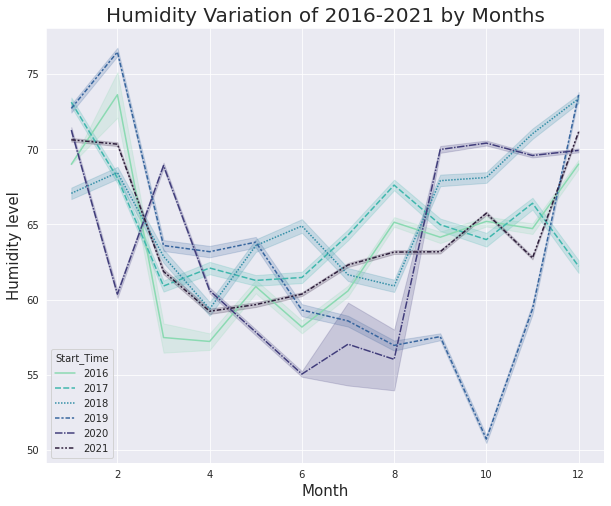

In [51]:
plt.figure(figsize = (10,8))
palette= sns.color_palette("mako_r",6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Humidity level",fontsize=15)
plt.title('Humidity Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Humidity(%)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year,palette=palette)

<AxesSubplot:title={'center':'Precipitation Variation of 2016-2021 by Months'}, xlabel='Month', ylabel='Precipitation level'>

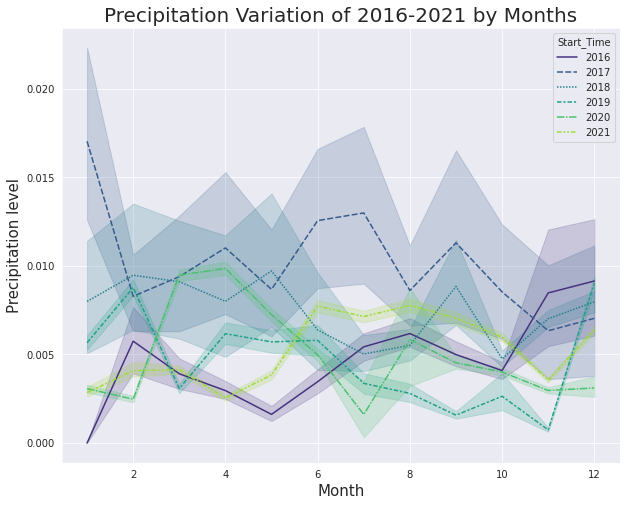

In [52]:
plt.figure(figsize = (10,8))
palette = sns.color_palette("viridis", 6)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Precipitation level",fontsize=15)
plt.title('Precipitation Variation of 2016-2021 by Months',size=20)
sns.lineplot(data=df, x=df.Start_Time.dt.month, y=df["Precipitation(in)"], hue=df.Start_Time.dt.year,
             style=df.Start_Time.dt.year,palette=palette)


It seems like Precipitation level of every year varies drastically. 2017 has the overall highest precipitation level, whereas 2021 and 2020 have the relatively low precipitation level. 2016 has the middle level of precipitation.

We also want to know if the start time of the accidents has change each of every year. During covid, the majority of jobs become work-from-home mode. Therefore, this new mode of working might have some impact on the number of accidents. Let's value count the number of accidents by start time per year in a new data frame.

In [53]:
# Again, I have to count the number of accidents by hour first. Then, we can line plot it by year.
#start_time_acc = df["Start_Time"].groupby(df.Start_Time.dt.hour).agg('count').reset_index(name='Num_Accidents_Hour')
#start_time_acc = df["Start_Time"].groupby(df.Start_Time.dt.year,df.Start_Time.dt.hour).agg('count').reset_index(name='Num_Accidents')
#start_time_acc
start_time_acc= df.groupby([df.Start_Time.dt.year,df.Start_Time.dt.hour]).count()
start_time_acc.index.names=['year','hour']
start_time_acc = start_time_acc.reset_index()
start_time_acc
#start_time_acc = start_time_acc.groupby(['year','hour']).count()
#start_time_acc

,year,hour,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,2016,0,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
1,2016,1,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082,1082
2,2016,2,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063
3,2016,3,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581
4,2016,4,1862,1862,1862,1862,1862,1862,1862,1862,1862,1862,1862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2021,19,59957,59957,59957,59957,59957,59957,59957,59957,59957,59957,59957
140,2021,20,49736,49736,49736,49736,49736,49736,49736,49736,49736,49736,49736
141,2021,21,46967,46967,46967,46967,46967,46967,46967,46967,46967,46967,46967
142,2021,22,41641,41641,41641,41641,41641,41641,41641,41641,41641,41641,41641


<AxesSubplot:title={'center':'The Start Time of Accidents from 2016-2021 by Months'}, xlabel='Time: hour of Accidents', ylabel='Number of Accidents'>

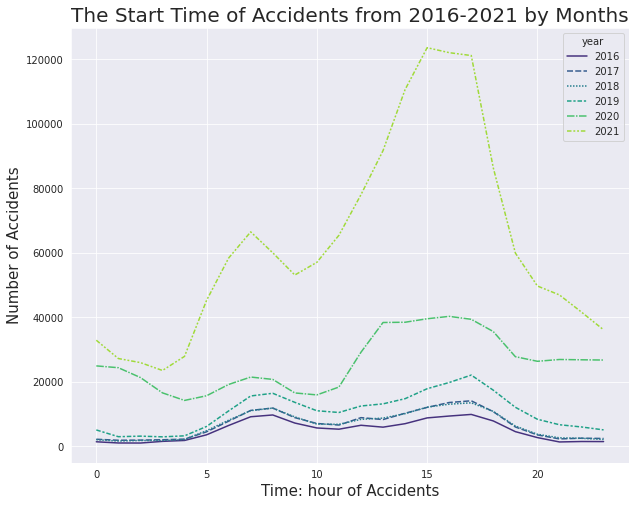

In [54]:
plt.figure(figsize = (10,8))
palette = sns.color_palette("viridis", 6)
plt.xlabel("Time: hour of Accidents",fontsize=15)
plt.ylabel("Number of Accidents",fontsize=15)
plt.title('The Start Time of Accidents from 2016-2021 by Months',size=20)
sns.lineplot(data=start_time_acc, x=start_time_acc['hour'], y=start_time_acc.ID,
             hue=start_time_acc.year,style=start_time_acc.year,palette=palette)
# Notice: the Start_Time now only contains HOUR


In [55]:
df[df['Start_Time'].dt.year==2021].value_counts()

ID         Severity  Start_Time           Start_Lat  Start_Lng    City            Temperature(F)  Humidity(%)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)
A-1000000  2         2021-08-16 11:06:30  28.447743  -81.473913   Orlando         87.000000       72.0         10.0            14.0             0.00                 1
A-496057   2         2021-08-16 14:38:06  41.725800  -72.654143   Wethersfield    80.000000       40.0         10.0            6.0              0.00                 1
A-496066   2         2021-10-24 13:33:00  34.155676  -83.642312   Jefferson       61.793556       93.0         10.0            0.0              0.00                 1
A-496065   2         2021-08-07 15:19:24  38.347106  -75.170552   Berlin          75.000000       96.0         5.0             9.0              0.05                 1
A-496064   2         2021-10-16 15:47:00  39.845020  -84.264378   Dayton          60.000000       39.0         10.0            23.0             0.00                 1
   

I find out that 2021 still has the most number of accidents at every hour. Nevertheless, this may not reflect the reality because 2021 has siginificantly more reported accidents than in 2016 or previous year. Interestingly, the pattern of each year looks almost identical. Each year's line is just higher than the previous one.

<a id='section-12'></a>
### Location Analysis

In [56]:
import folium
from folium.plugins import HeatMap
sample_df= df.sample(int(0.001*len(df)))
lat_lng_pairs= list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))
map= folium.Map([38.552397, -96],zoom_start=6, min_zoom = 5, max_zoom = 13)
HeatMap(lat_lng_pairs).add_to(map)
map

Above is another interesting map that shows where car accidents occur more frequently. Indeed, if we locate to New York City, we don't have any data to show. If we locate to Miami and Los angeles, the number of car accidents is high. East and west coast have the highest number of car accidents, whereas the middle of the states are relatively more 'safe.'

This map may not be able to tell much things about the COVID-19 though. For future work, we might need more information about number of cases and COVID-19 regions in the form of heatmap.

In [57]:
df

,ID,Severity,Start_Time,Start_Lat,Start_Lng,City,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,Dublin,42.1,58.0,10.0,10.4,0.00
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,Dayton,36.9,91.0,10.0,0.0,0.02
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,Cincinnati,36.0,97.0,10.0,0.0,0.02
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,Akron,39.0,55.0,10.0,0.0,0.00
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,Cincinnati,37.0,93.0,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,86.0,40.0,10.0,13.0,0.00
2845338,A-2845339,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,70.0,73.0,10.0,6.0,0.00
2845339,A-2845340,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,73.0,64.0,10.0,10.0,0.00
2845340,A-2845341,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,71.0,81.0,10.0,8.0,0.00


<a id="section-6"></a>
## Share
Another presentation (PPT) will be created and will be different from this report.
[Click here.](https://docs.google.com/presentation/d/18dBTRLkMDoWYM1xw4d-Bh1BPhp5tDC16HbJPYdcKn7A/edit#slide=id.p)

<a id="section-7"></a>
## Act
### Findings
* New York State car accidents data is not included in the dataset.
* Miami is the city with the most number of car accidents.
* The Temperature is almost normally distributed.
* Wind Speed, Visibility, Precipitation all follow a right skewed distribution.
* Humidity on the other hand follows a left skewed distribution.
* There are 127 types of weather condition in the dataset.
* There are 137 data rows that have no city mentioned.
* The severity of a car accident is described by a scale from 1 to 4. where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
* 89% of the car accidents are considered a severity of 2. Only 0.9% of car accidents have a severity score of 1.
* Temperature does not have much of an impact on the severity of the accident. However, extreme weather temperature, like below -50 F degree, usually only causes accidents that have a severity score of 2.
* Car accidents are most likely to happen at the temperature around 50-80 F degree. 
* The number of car accidents increases as the humidity increases. The majority of accidents due to humidty has a severity score of 2.
* Severe car accidents are mostly accompanied with a low visibility (below 50 mi). Meanwhile, The least severe car accidents tend to have the poorest visibility (below 20 mi).
* Precipitation and the number of accidents have a simple inverse relationship. The heavier the rain, the fewer the number of car accidents.
* Precipitation does not affect the severity of the accidents as much as the previous factors. However, during heavy rain(25inch), accidents mostly have a severity score of 2.
* Wind Speed affects the severity of the accidents almost equally.
* High wind speed, above 20mph, accompanies with 0 reported car accidents. Low wind speed, below 20 mph, accompanies with more car accidents as it decreases.
* A high percentage of accidents occur between 15 to 18. Probably people’r hurry to get home. The next highest one is around 6 to 8.
* On weekends the number of accidents happened at 0 o’clock is higher than weekdays’.
* Weekday accidents distribution is almost the same as the overall accidents distribution.
* For every year from 2016-2021, the number of reported car accidents increases. 2021 has the most number of car accidents.
* Temperature of accident trends of every year are stable.
* For every year from 2016-2021, humidity trends are stable except during Oct 2019.
* 2017 being the year with the most precipitation has fewer accidents than 2021 being the year with moderate precipitation.
* 2021 still has the most number of accidents at every hour. Nevertheless, this may not reflect the reality because 2021 has significantly more reported accidents than in 2016 or previous year. Interestingly, the pattern of each year looks almost identical. Each year's line is just higher than the previous one.
* During covid 19 months, the number of car accidents has increased significantly. Feb 2020 is the start of COVID.
* During covid 19 months, though most jobs become work from home. The number of car accidents happened at every hour has the same pattern as previous years though much higher.
* Cities with the most Covid-19 cases have more car accidents.

### Answers to the hypothesis
* Cold weathers does not have a strong relation with the number of traffics. Moderate temperatures, 50-80F, correspond with high number of accidents. Extreme weather temperature, higher than 90 or lower than -50, do result in more severe accidents.
* Low visibility (<5mi) has a strong relation with the number of accidents. Low visibility affects the severity of accidents almost equally, no matter what the severity score is.
* A high precipitation level does not cause more accidents. People may stay at indoors more often when rains are heavy. A high precipitation does cause more severe accidents more often.
* A high wind speed does not cause more accident. People may stay at indoors more often when winds are strong. A high wind speed does cause more sever accidents more often.
* No matter what the humility level is, it does not hava a strong relation with the severity of accidents. Though most of the reported accidents due to humility have a severity score of 2.
* COVID-19 could have some impacts on the increased number of car accidents. Nevertheless, the increased number of car accidents might be due to other factors that are not shown in the dataset. During this COVID-19 period, many factors could account for the increased number of car accidents. COVID-19 is just one of the explanations.
During the COVID-19 period, starting from Feb 2020, the number of car accidents increase so much faster and higher than previous years. Since the temperature and humidity level do follow very similar trends across the years, the number of increased car accidents should not be due to these two environmental factors. The precipitation level varies yearly drastically, so it may have some minimal impact on number of car accidents during the COVID-19 period. During the COVID-19 period, people work from home, but the number of accidents at every hour in 2021 is still the highest, so the working from home mode does not decrease the number of car accidents during this COVID-19 period.

### Suggestions to the stakeholders
* Increase help and resting station for drivers all year round. This is due to most car accidents happened at a normal temperature 50-80F.
* Provide benefits for people staying at indoors when the weather has a low visibility. This is due to low visibility results in more car accidents than any other environmental factors. 
* Give incentives for people who stay off cars during the COVID-19 period. This is due to the work-from-home mode and yearly environmental factors do not contribute to more car accidents.

## Reference
Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.